# Fluid Packer

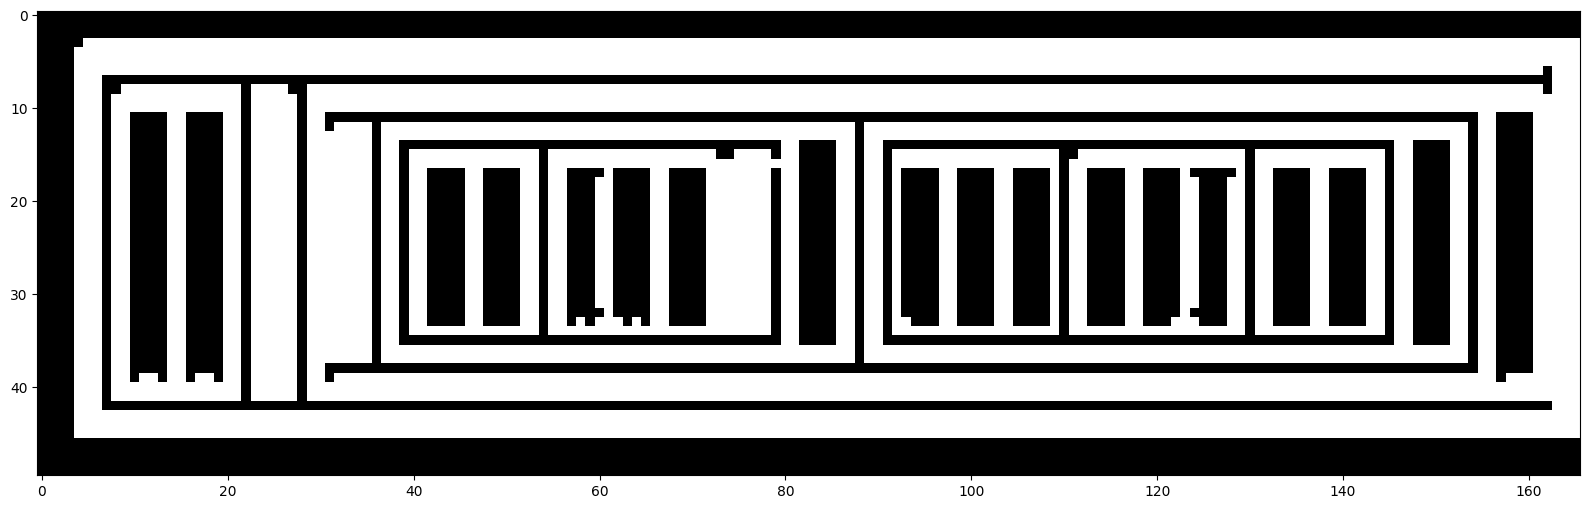

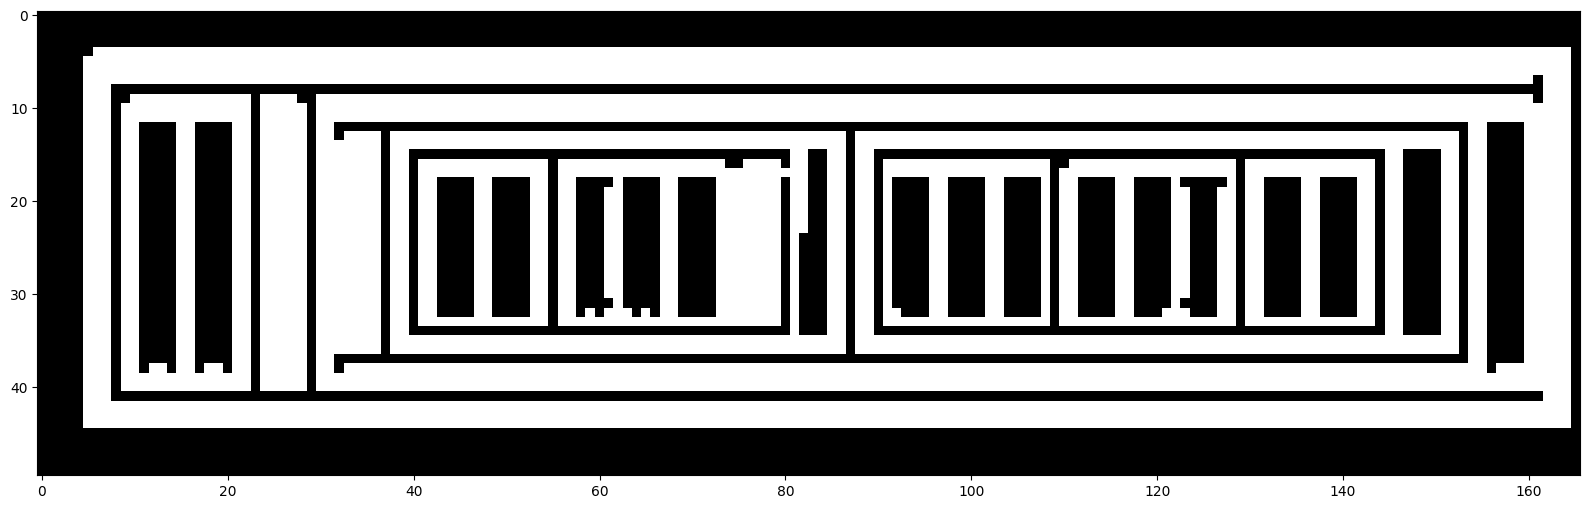

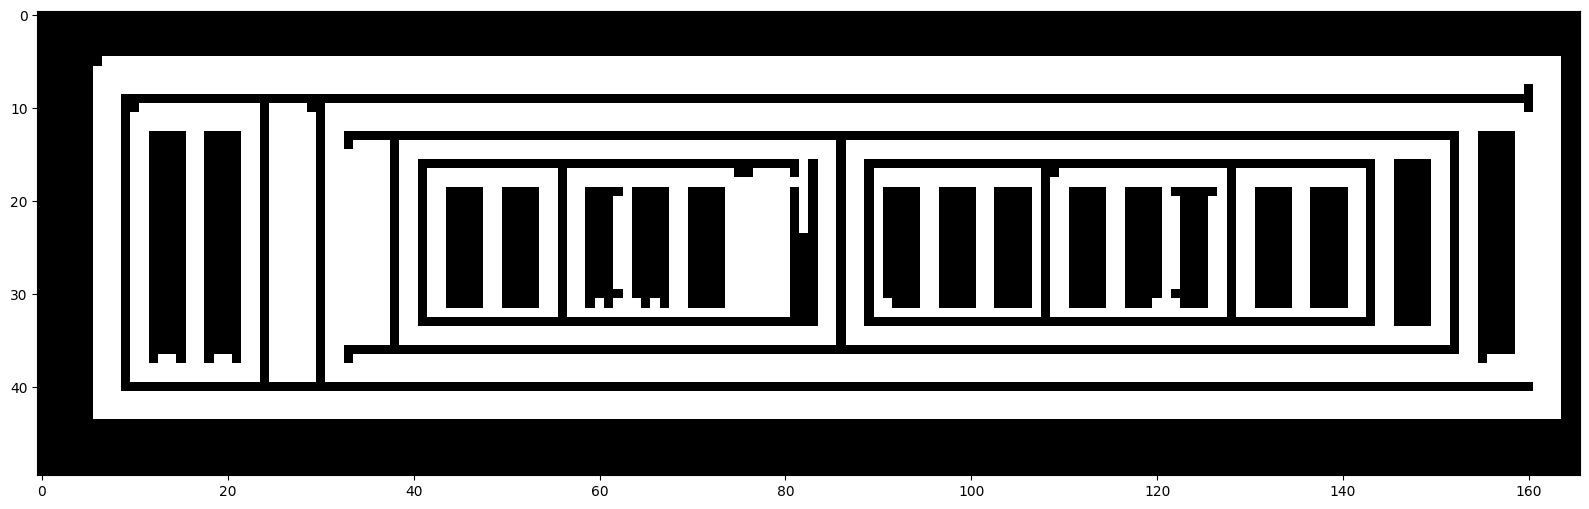

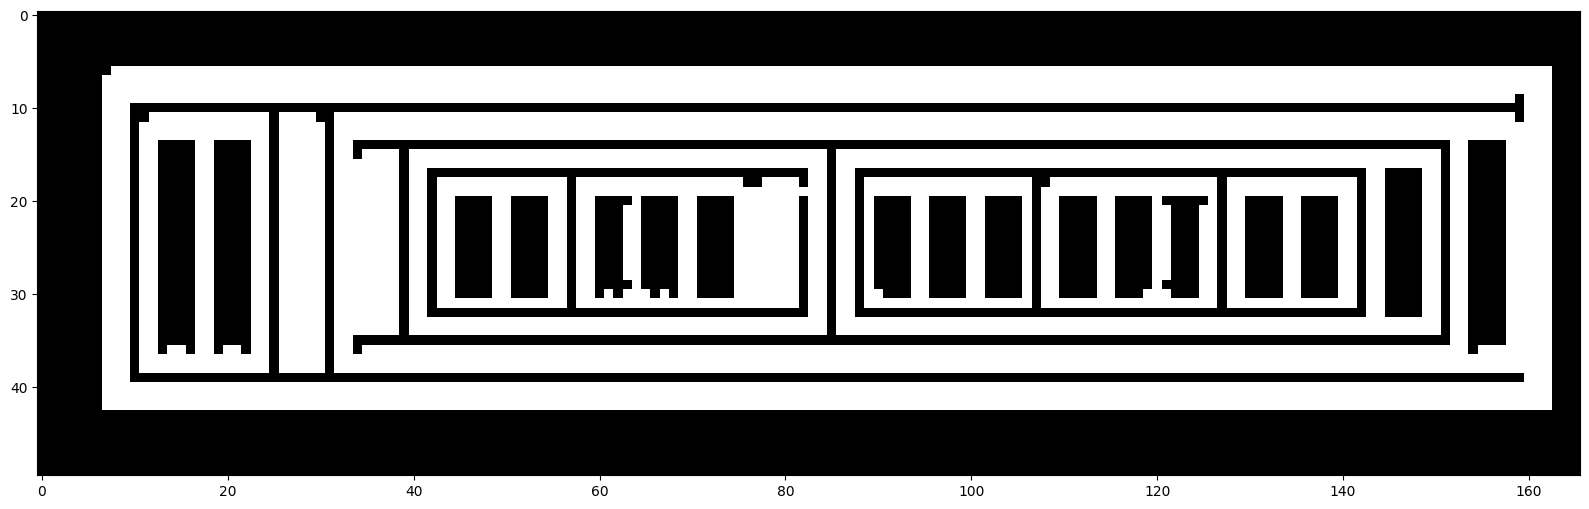

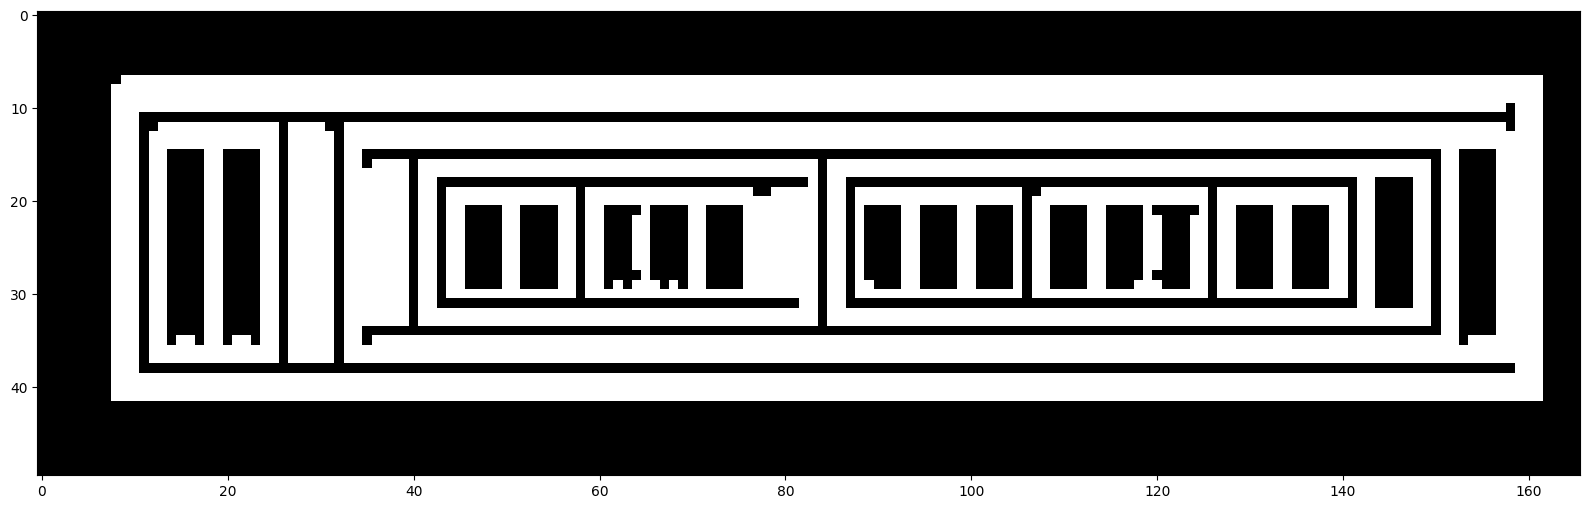

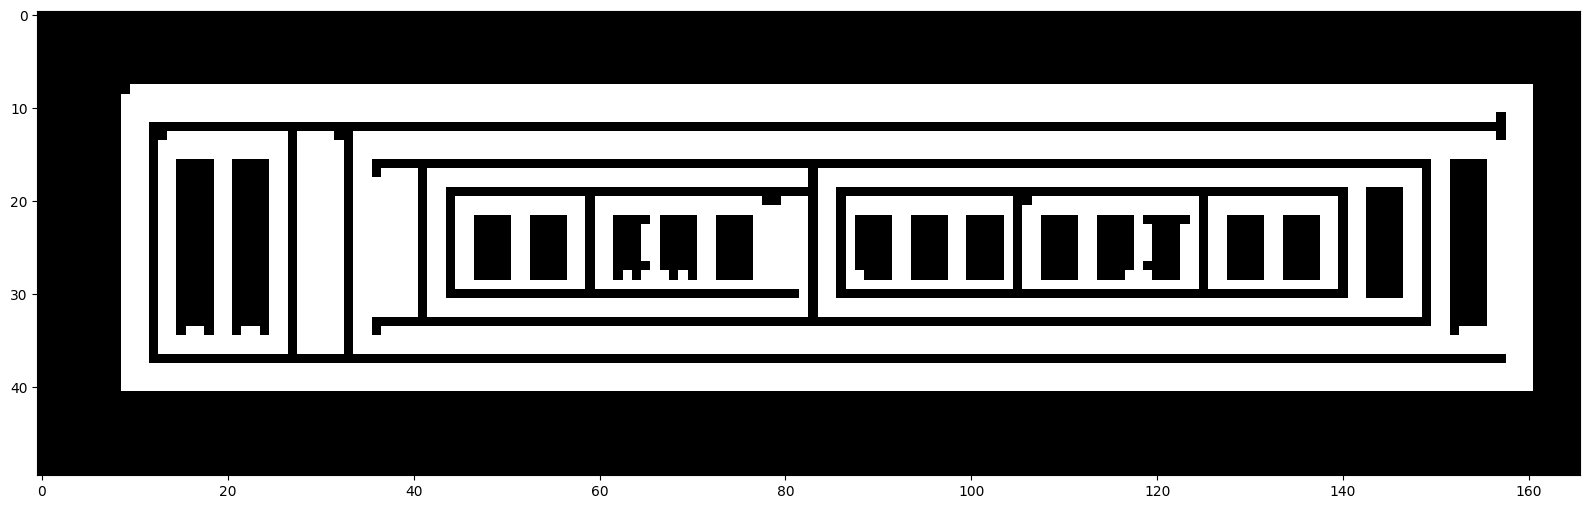

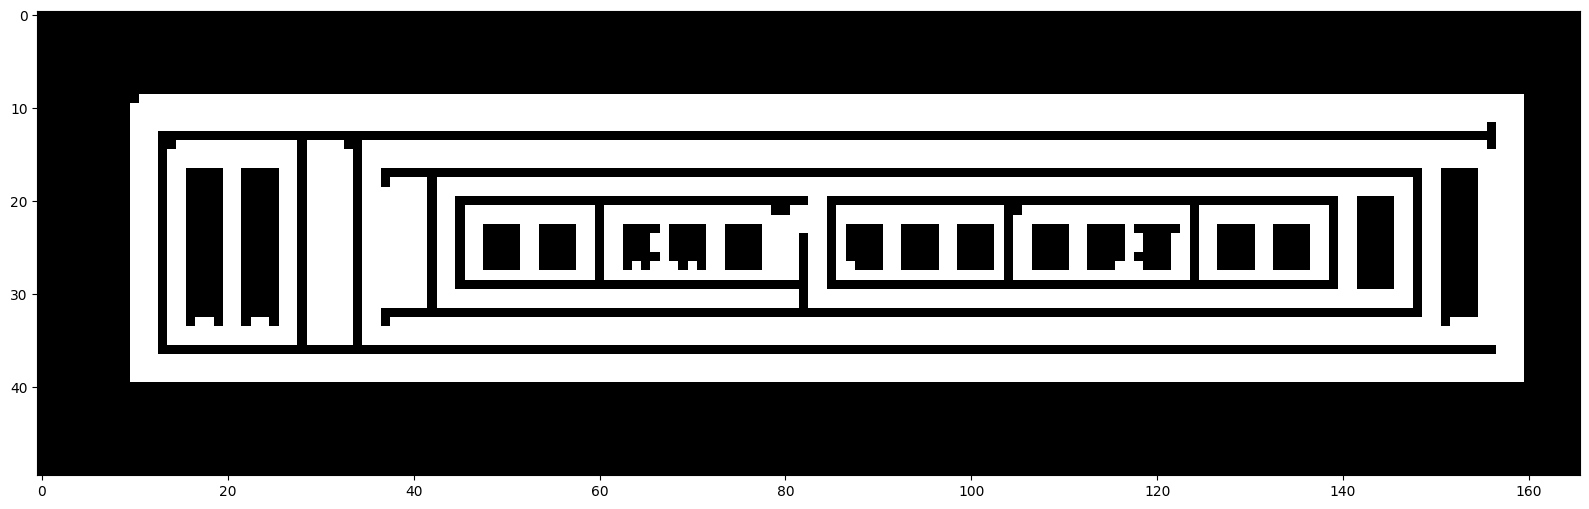

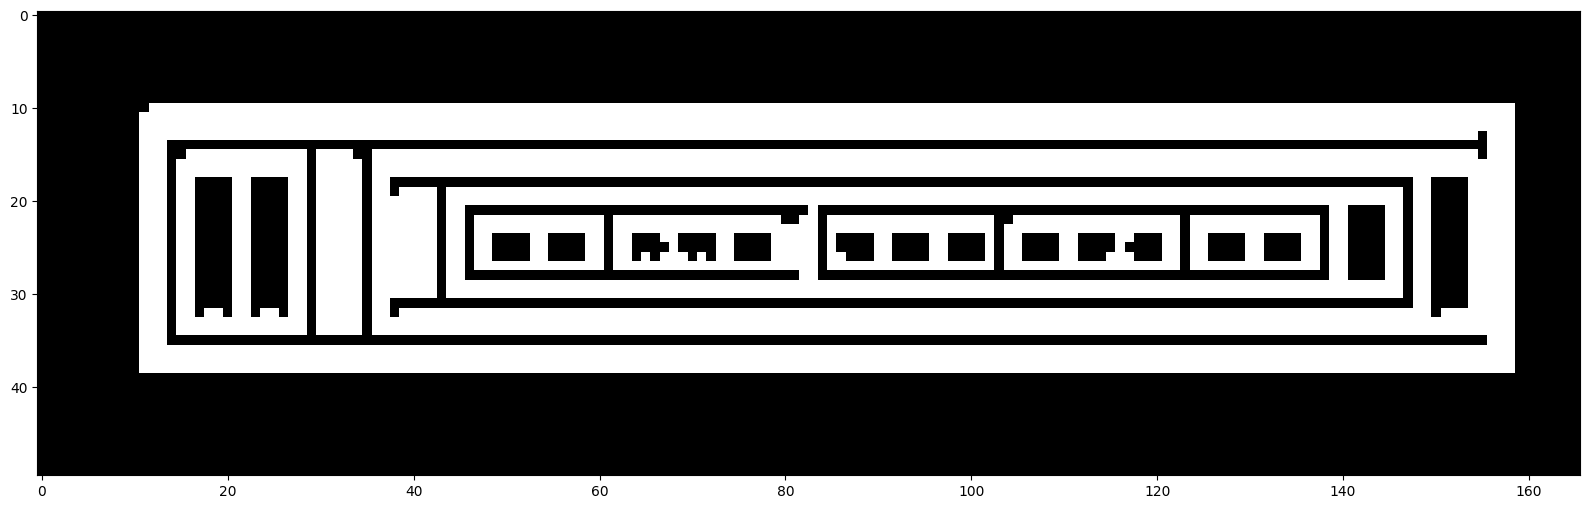

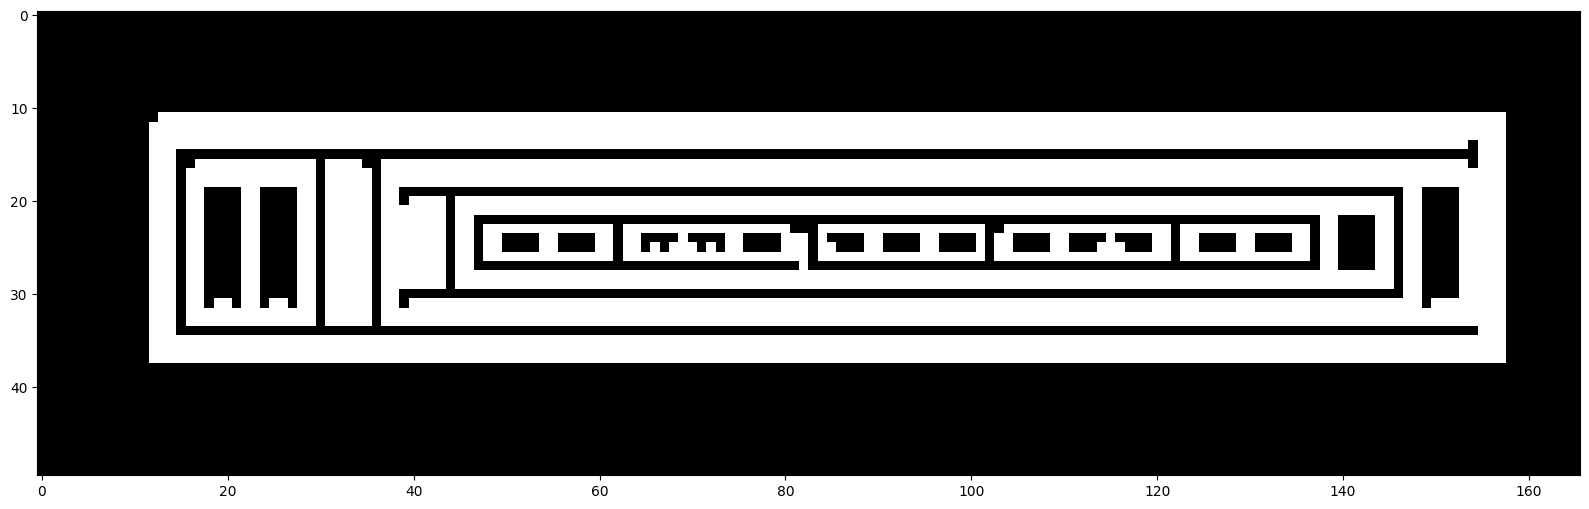

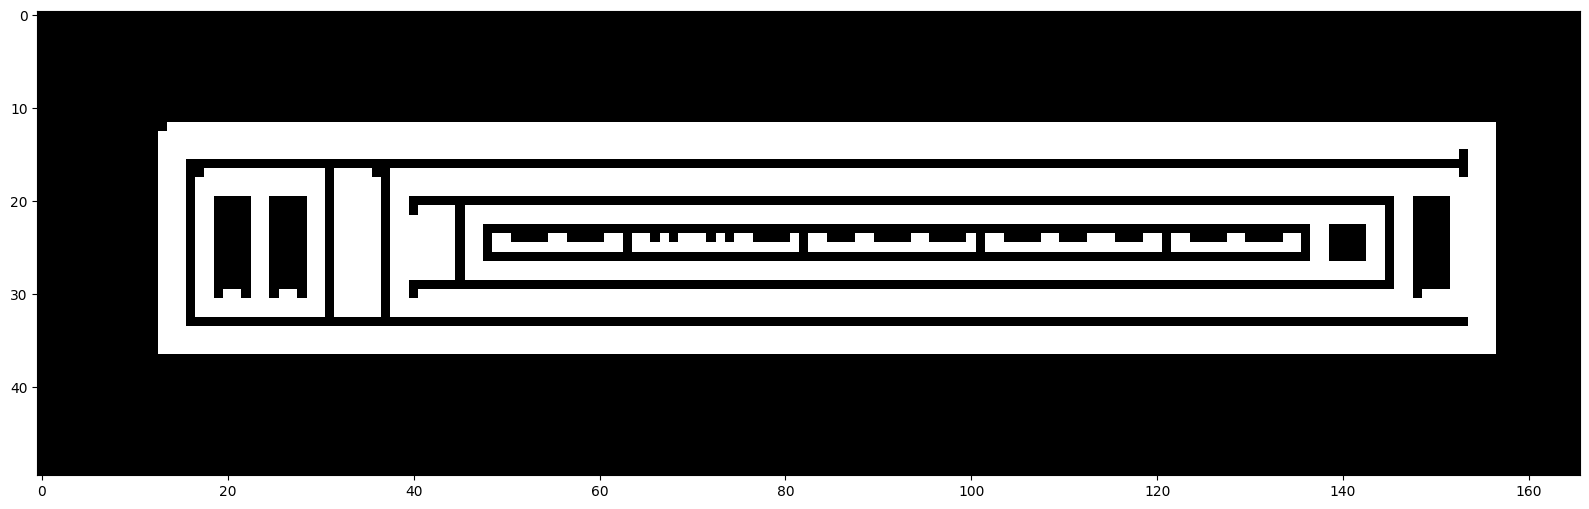

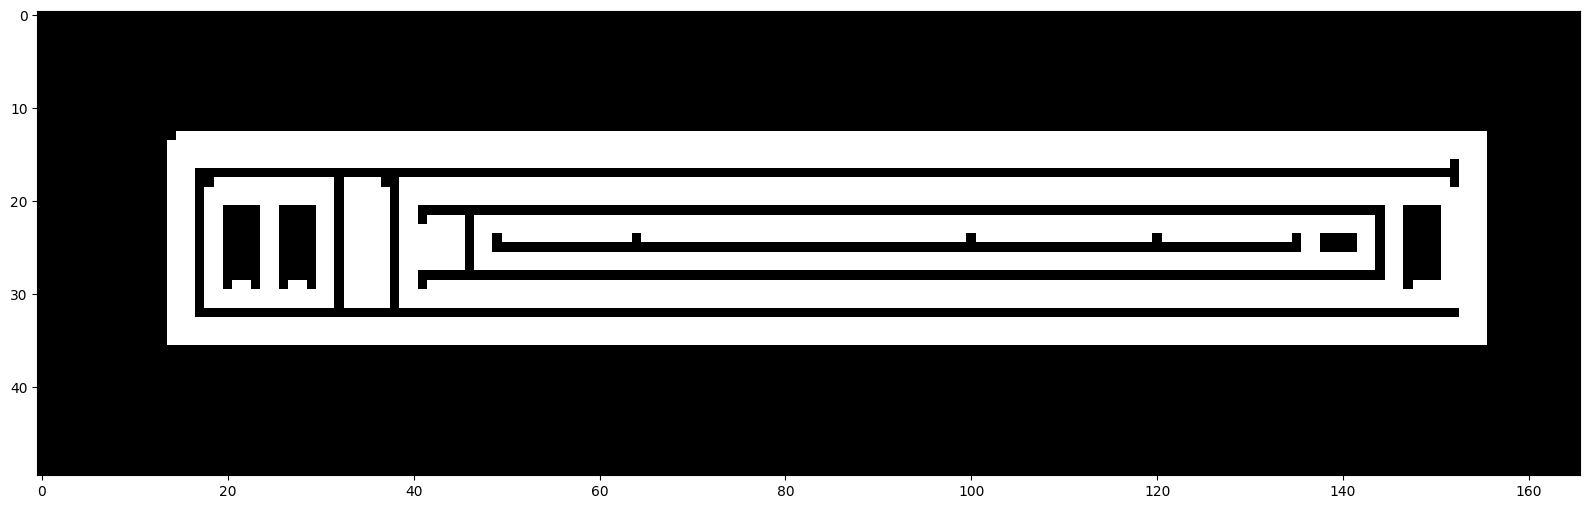

In [2]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import skimage
from skimage.color import rgb2gray
from skimage import filters

def show(img):
    fig, axes = plt.subplots(1, 1, figsize=(16, 8))
    axes.imshow(img, cmap='gray')
    fig.tight_layout()
    plt.show()

img = io.imread("small.png", as_gray=True)

# Apply Otsu's tresholding
threshold_value = filters.threshold_otsu(img)
img = img > threshold_value

# show(img)

def is_at_least_px(img, y, x, min_pixels=3):
    color = img[y][x]
    frontier = {(y,x)}
    while len(frontier) > 0:
        py,px = frontier.pop()
        min_pixels -= 1
        if min_pixels == 0:
            return True
        for ppx in np.array([-1,0,1])+px:
            for ppy in np.array([-1,0,1])+py:
                if (ppy >= 0 and ppy < img.shape[0] and 
                    ppx >= 0 and ppx < img.shape[1] and
                    img[ppy,ppx] == color):
                    frontier.add((ppy,ppx))

    return False
        
def color_at(img, y, x):
    if 0 <= y < img.shape[0] and 0 <= x < img.shape[1]:
        return img[y][x]
    else:
        return False # Outside the image is considered black

show(img)

# Collapse to center
h = img.shape[0]
w = img.shape[1]
for _ in range(10):
    for _ in range(100):
        new_img = img.copy()
        for y in range(img.shape[0]):
            for x in range(img.shape[1]):
                dy = 1 if y < h/2 else -1
                dx = 1 if x < w/2 else -1
                if is_at_least_px(img, y+dy, x+dx):
                    new_img[y][x] = color_at(img, y-dy, x-dx)
                    new_img[y+dy][x+dx] = img[y][x]
    img = new_img
    show(img)

